# **Product_Subscription : Exploratory Data Analysis**

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,10
from pandas_profiling import ProfileReport

## 1) 1er jeu de données: Indicateurs socio-économiques

In [110]:
df1 = pd.read_csv('../data/raw/socio_eco.csv', sep=';')
df1.head()

,DATE,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,2008-05-31,1.1,93.994,-36.4
1,2008-06-30,1.4,94.465,-41.8
2,2008-07-31,1.4,93.918,-42.7
3,2008-08-31,1.4,93.444,-36.1
4,2008-09-30,NaN,NaN,NaN


Ce jeu de données comprend des indicateurs macro-économiques classiques, relatifs au niveau du chômage, de l'inflation et de la propension à consommer. 

Les données sont rendues pour chaque fin de mois et correspondent donc au chiffre estimé pour le mois écoulé.

Ils couvrent la période s'étendant de mi-2008 à fin 2010, ce qui correspond à une période singulière de l'histoire économique et financière récente, avec la crise bancaire et financière liée aux subprimes américains et la récession économique qui a suivit.

Nous remarquons la présence de NaN dans les trois colonnes:

- Pour la colonne **EMPLOYMENT_VARIATION_RATE**, on pourra les corriger facilement puisqu'il s'agit d'indicateurs trimestriels; les valeurs manquantes sont donc connues.

- Pour la colonne **IDX_CONSUMER_PRICE**, les valeurs manquantes pourront être approchées par l'utilisation de la médiane ou de la moyenne.

- Pour la colonne **IDX_CONSUMER_CONFIDENCE**, on procèdera de manière analogue.

In [ ]:
#indices = ProfileReport(df1 , title="Indices Eco", explorative=True)
#indices.to_notebook_iframe()

In [188]:
(df1.isna().sum() / df1.shape[0] * 100).sort_values(ascending=False)

IDX_CONSUMER_CONFIDENCE      16.666667
IDX_CONSUMER_PRICE           16.666667
EMPLOYMENT_VARIATION_RATE    16.666667
DATE                          0.000000
dtype: float64

In [189]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       30 non-null     object 
 1   EMPLOYMENT_VARIATION_RATE  25 non-null     float64
 2   IDX_CONSUMER_PRICE         25 non-null     float64
 3   IDX_CONSUMER_CONFIDENCE    25 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


(30, 4)

In [98]:
df1.describe()

,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
count,25.000000,25.00000,25.000000
mean,-1.404000,93.37128,-38.760000
std,1.545283,0.72030,6.198185
min,-3.400000,92.20100,-50.000000
25%,-2.900000,92.75600,-42.000000
50%,-1.800000,93.36900,-39.800000
75%,-0.200000,93.99400,-34.600000
max,1.400000,94.60100,-26.900000


array([[<AxesSubplot:title={'center':'EMPLOYMENT_VARIATION_RATE'}>,
        <AxesSubplot:title={'center':'IDX_CONSUMER_PRICE'}>],
       [<AxesSubplot:title={'center':'IDX_CONSUMER_CONFIDENCE'}>,
        <AxesSubplot:>]], dtype=object)

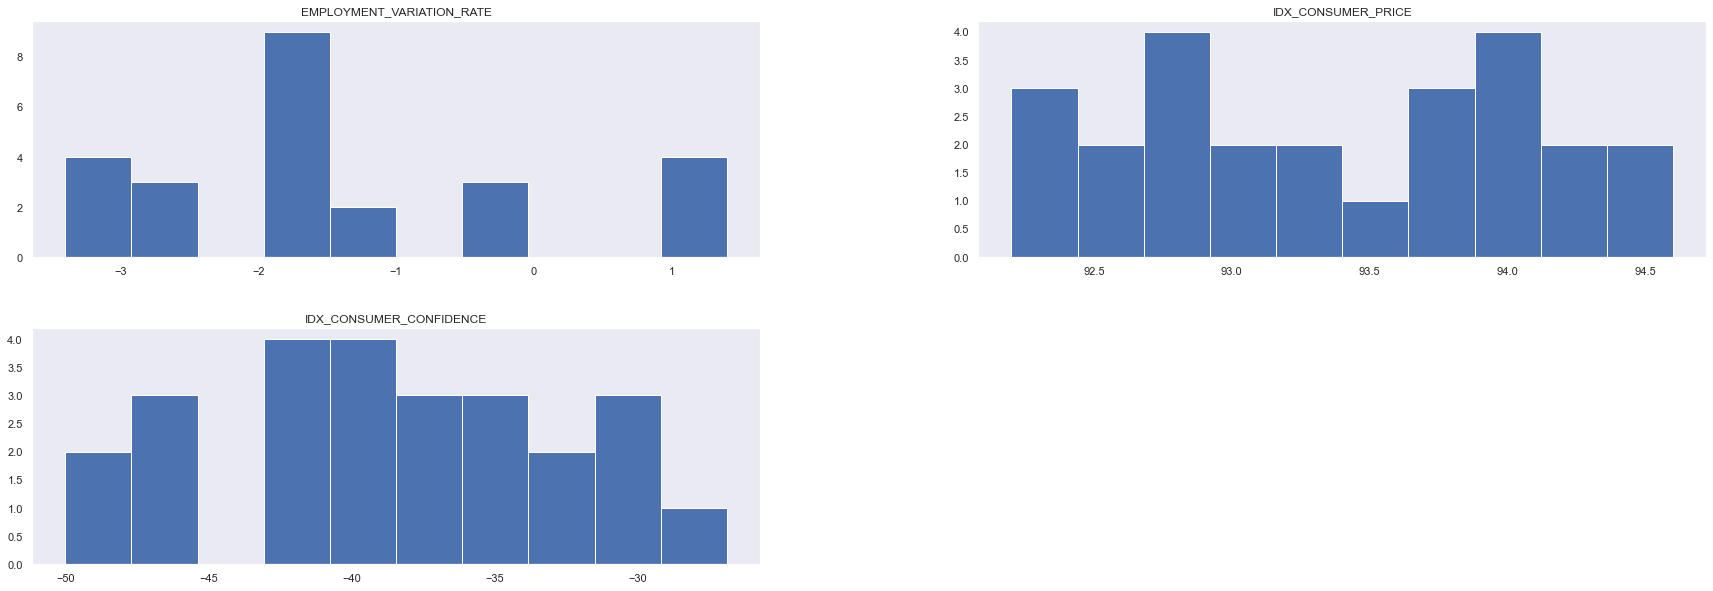

In [99]:
df1.hist(grid=False)

In [100]:
df1.corr(method='pearson')

,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
EMPLOYMENT_VARIATION_RATE,1.000000,0.605044,-0.431355
IDX_CONSUMER_PRICE,0.605044,1.000000,-0.401891
IDX_CONSUMER_CONFIDENCE,-0.431355,-0.401891,1.000000


In [101]:
df1.corr(method='spearman')

,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
EMPLOYMENT_VARIATION_RATE,1.000000,0.720458,-0.532766
IDX_CONSUMER_PRICE,0.720458,1.000000,-0.432308
IDX_CONSUMER_CONFIDENCE,-0.532766,-0.432308,1.000000


In [102]:
df1.corr(method='kendall')

,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
EMPLOYMENT_VARIATION_RATE,1.000000,0.557637,-0.389294
IDX_CONSUMER_PRICE,0.557637,1.000000,-0.300000
IDX_CONSUMER_CONFIDENCE,-0.389294,-0.300000,1.000000


Importe corrélation positive entre la variation du taux de chômage et l'indice des prix à la consommation.
Très forte corrélation monotone de Spearman notamment.

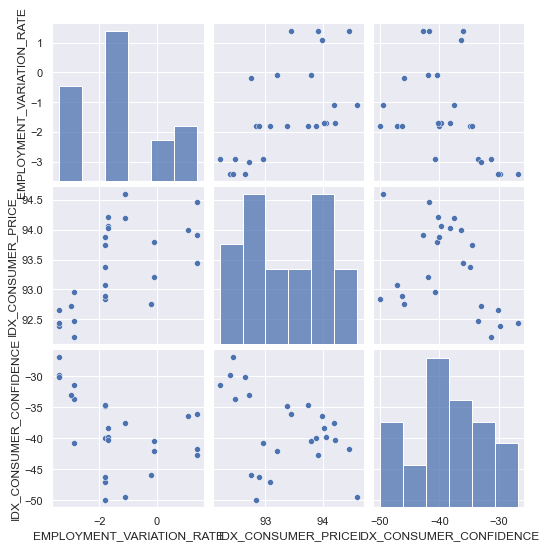

In [103]:
sns.set_theme(context='notebook', palette='deep')
sns.pairplot(df1)

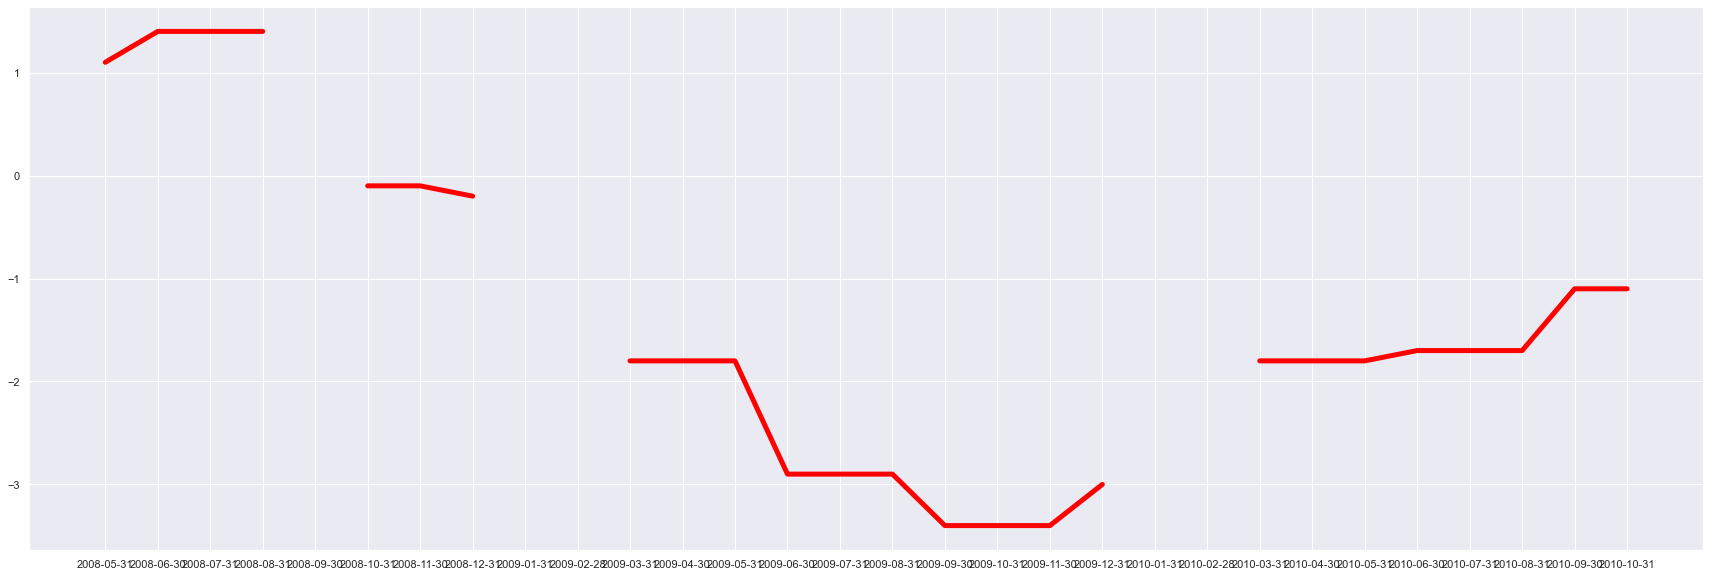

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df1['DATE'],df1['EMPLOYMENT_VARIATION_RATE'], color='red', linewidth=5)
plt.show()

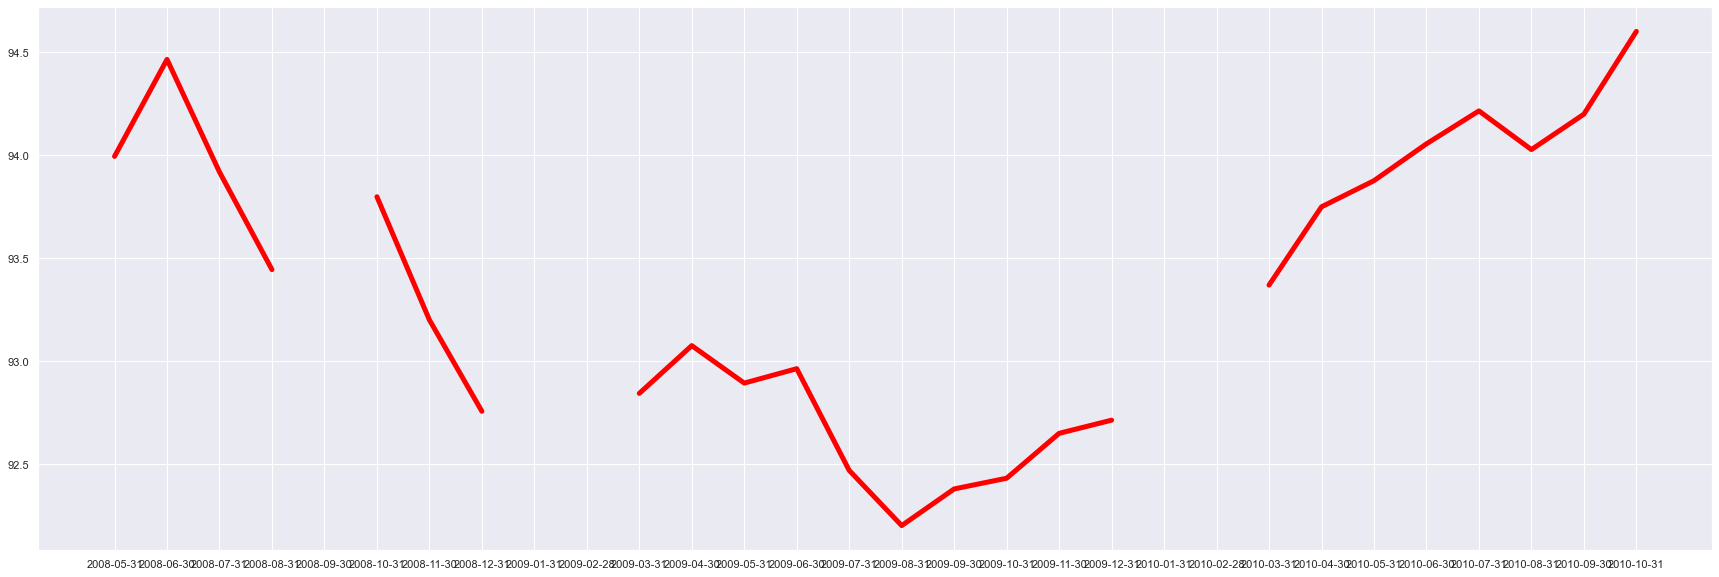

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df1['DATE'],df1['IDX_CONSUMER_PRICE'], color='red', linewidth=5)
plt.show()

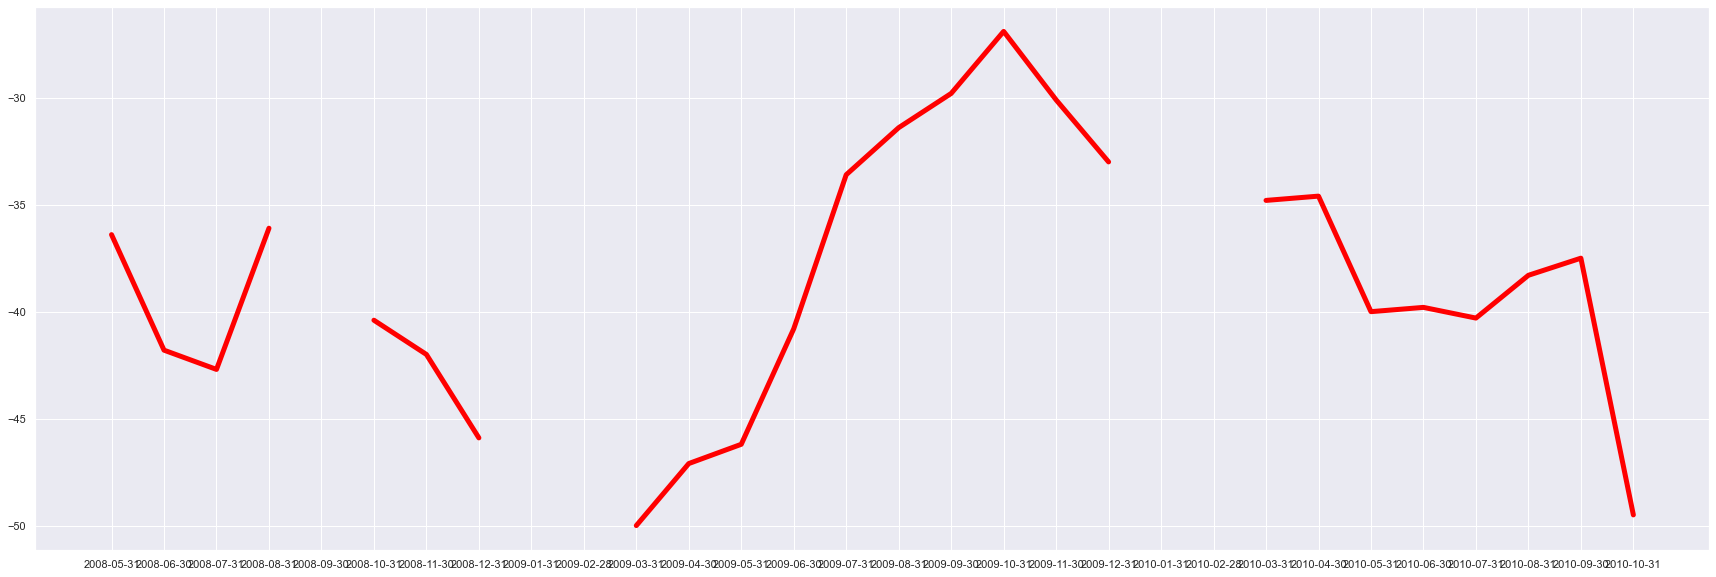

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df1['DATE'],df1['IDX_CONSUMER_CONFIDENCE'], color='red', linewidth=5)
plt.show()

## 2) 2nd jeu de données: Campagne marketing d'une grande institution bancaire

In [120]:
df2 = pd.read_csv('../data/raw/data.csv', sep=";")
df2.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,92,1,-1,0,NaN,No
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,No


Nous avons **14 variables explicatives** dans ce jeu de données : 

- Informations **personnelles** sur les clients:
    - *AGE*: Age du client (en années)
    - *STATUS*: Situation matrimoniale du client (Marié, Célibataire, Divorcé)
    - *EDUCATION*: Niveau de diplôme (Primaire, Secondaire ou Tertiaire)
    - *JOB_TYPE*: Catégorie de métier du client (Manager, Technicien, Entrepreneur, Col Bleu, Retraité, Administratif, Services, Indépendant, Chômeur, Employé de ménage , Etudiant)


- Informations sur la **situation financière** des clients:
    - *HAS_DEFAULT*: Le client a-t-il déja fait défaut (Yes/No)
    - *BALANCE*: Le montant du compte courant du client
    - *HAS_HOUSING_LOAN* : Détention d'un crédit immobilier(Yes/No)
    - *HAS_PERSO_LOAN* : Détention d'un crédit à la consommation (Yes/No)
    
    
- Informations sur la **campagne marketing**:
    - *CONTACT* : Type de communication du contact (Portable, Fixe)
    - *DURATION_CONTACT* : Durée du dernier contact (en secondes)
    - *NB_CONTACT* : Nombre de contacts effectués pendant cette campagne et pour ce client (inclut le dernier contact)
    - *NB_DAY_LAST_CONTACT* : Nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (-1 signifie que le client n'a pas été contacté auparavant)
    - *NB_CONTACT_LAST_CAMPAIGN* : Nombre de contacts effectués avant cette campagne et pour ce client
    - *RESULT_LAST_CAMPAIGN* : Résultat de la précédente campagne marketing (Succès, Echec, Autre)
    
Nous avons **1 variable cible**:

- *SUBSCRIPTION* : Le client a-t-il souscrit ou non ? (Yes/No)

In [209]:
#campagne_marketing = ProfileReport(df2 , title="Campagne Marketing", explorative=True)
#campagne_marketing.to_notebook_iframe()

In [187]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45136 entries, 0 to 45135
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATE                      45136 non-null  object
 1   AGE                       45136 non-null  int64 
 2   JOB_TYPE                  44850 non-null  object
 3   STATUS                    44008 non-null  object
 4   EDUCATION                 43283 non-null  object
 5   HAS_DEFAULT               45136 non-null  object
 6   BALANCE                   45136 non-null  int64 
 7   HAS_HOUSING_LOAN          45136 non-null  object
 8   HAS_PERSO_LOAN            43782 non-null  object
 9   CONTACT                   32117 non-null  object
 10  DURATION_CONTACT          45136 non-null  int64 
 11  NB_CONTACT                45136 non-null  int64 
 12  NB_DAY_LAST_CONTACT       45136 non-null  int64 
 13  NB_CONTACT_LAST_CAMPAIGN  45136 non-null  int64 
 14  RESULT_LAST_CAMPAIGN  

(45136, 16)

In [124]:
(df2.isna().sum() / df2.shape[0] * 100).sort_values(ascending=False)

RESULT_LAST_CAMPAIGN        81.839330
CONTACT                     28.843938
EDUCATION                    4.105370
HAS_PERSO_LOAN               2.999823
STATUS                       2.499114
JOB_TYPE                     0.633641
SUBSCRIPTION                 0.000000
NB_CONTACT_LAST_CAMPAIGN     0.000000
NB_DAY_LAST_CONTACT          0.000000
NB_CONTACT                   0.000000
DURATION_CONTACT             0.000000
HAS_HOUSING_LOAN             0.000000
BALANCE                      0.000000
HAS_DEFAULT                  0.000000
AGE                          0.000000
DATE                         0.000000
dtype: float64

Importante présence de NaN dans deux colonnes, plus réduite dans quatre colonnes.
Six variables explicatives à traiter pour valeurs manquantes.

In [122]:
df2.describe()

,AGE,BALANCE,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN
count,45136.000000,45136.000000,45136.000000,45136.00000,45136.000000,45136.000000
mean,44.206354,1362.182847,258.050625,2.76573,40.042272,0.575173
std,19.149653,3046.691765,257.527875,3.10002,99.910200,2.296948
min,18.000000,-8019.000000,0.000000,1.00000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.00000,-1.000000,0.000000
50%,40.000000,447.500000,180.000000,2.00000,-1.000000,0.000000
75%,50.000000,1425.000000,318.000000,3.00000,-1.000000,0.000000
max,123.000000,102127.000000,4918.000000,63.00000,854.000000,275.000000


In [137]:
df2.corr('pearson')

,AGE,BALANCE,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN
AGE,1.000000,0.050835,-0.004716,0.001231,-0.018904,0.001475
BALANCE,0.050835,1.000000,0.021517,-0.014605,0.003466,0.016515
DURATION_CONTACT,-0.004716,0.021517,1.000000,-0.084752,-0.001896,0.000483
NB_CONTACT,0.001231,-0.014605,-0.084752,1.000000,-0.088337,-0.032310
NB_DAY_LAST_CONTACT,-0.018904,0.003466,-0.001896,-0.088337,1.000000,0.454566
NB_CONTACT_LAST_CAMPAIGN,0.001475,0.016515,0.000483,-0.032310,0.454566,1.000000


In [138]:
df2.corr('spearman')

,AGE,BALANCE,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN
AGE,1.000000,0.085968,-0.031712,0.032809,-0.018791,-0.013788
BALANCE,0.085968,1.000000,0.042309,-0.030775,0.068981,0.078719
DURATION_CONTACT,-0.031712,0.042309,1.000000,-0.108045,0.027832,0.030110
NB_CONTACT,0.032809,-0.030775,-0.108045,1.000000,-0.111566,-0.107692
NB_DAY_LAST_CONTACT,-0.018791,0.068981,0.027832,-0.111566,1.000000,0.985849
NB_CONTACT_LAST_CAMPAIGN,-0.013788,0.078719,0.030110,-0.107692,0.985849,1.000000


In [139]:
df2.corr('kendall')

,AGE,BALANCE,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN
AGE,1.000000,0.058194,-0.021378,0.024563,-0.014758,-0.011013
BALANCE,0.058194,1.000000,0.028355,-0.022788,0.053650,0.062230
DURATION_CONTACT,-0.021378,0.028355,1.000000,-0.080039,0.021810,0.023849
NB_CONTACT,0.024563,-0.022788,-0.080039,1.000000,-0.096198,-0.093732
NB_DAY_LAST_CONTACT,-0.014758,0.053650,0.021810,-0.096198,1.000000,0.903528
NB_CONTACT_LAST_CAMPAIGN,-0.011013,0.062230,0.023849,-0.093732,0.903528,1.000000


Une seule corrélation observée entre 'NB_DAY_LAST_CONTACT' et 'NB_CONTACT_LAST_CAMPAIGN', très élévée en Spearman et Kendall.

<AxesSubplot:xlabel='AGE', ylabel='count'>

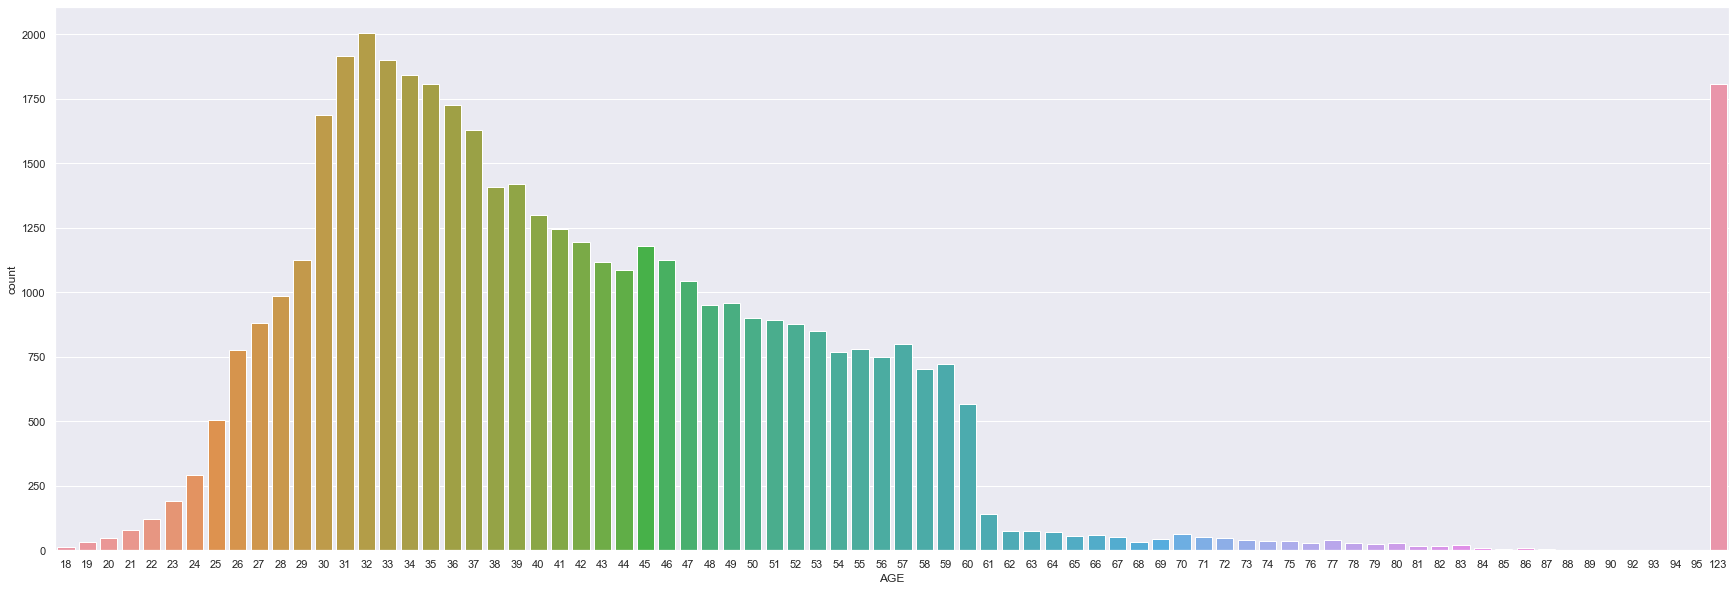

In [127]:
sns.countplot(x=df2['AGE'])

Présence fortement marquée d'une valeur aberrante, en proportion significative, à l'âge 123 ans, valeur elle-même objectivement improbable statistiquement. 

<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

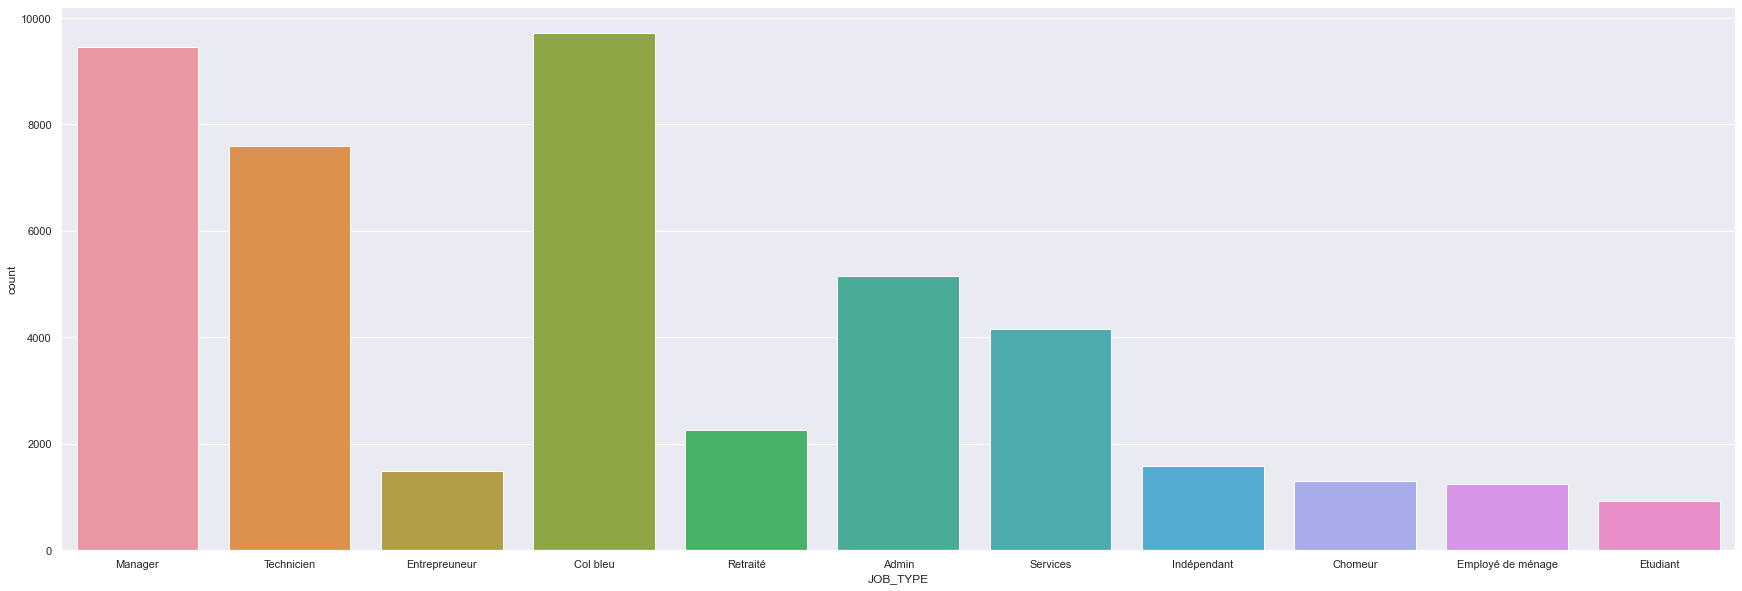

In [132]:
sns.countplot(x=df2['JOB_TYPE'])

<AxesSubplot:xlabel='STATUS', ylabel='count'>

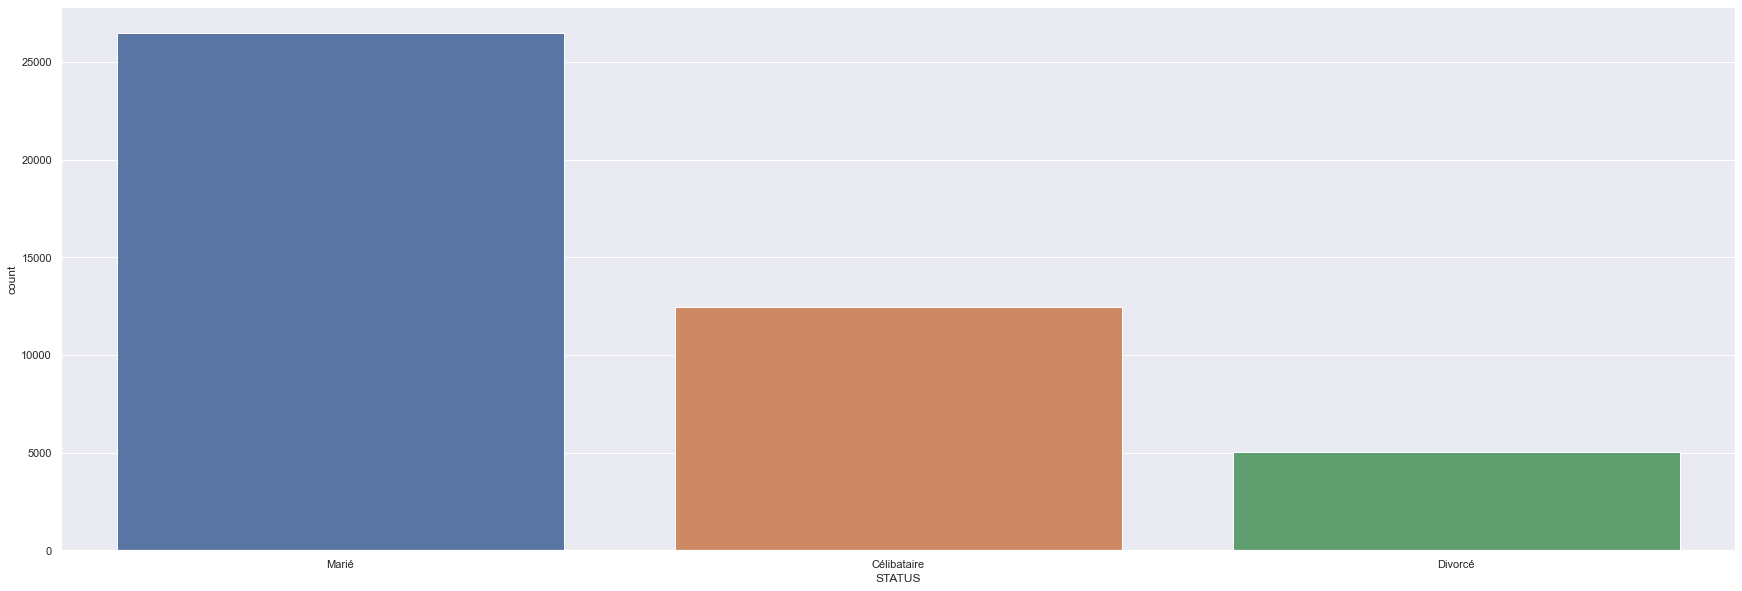

In [133]:
sns.countplot(x=df2['STATUS'])

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

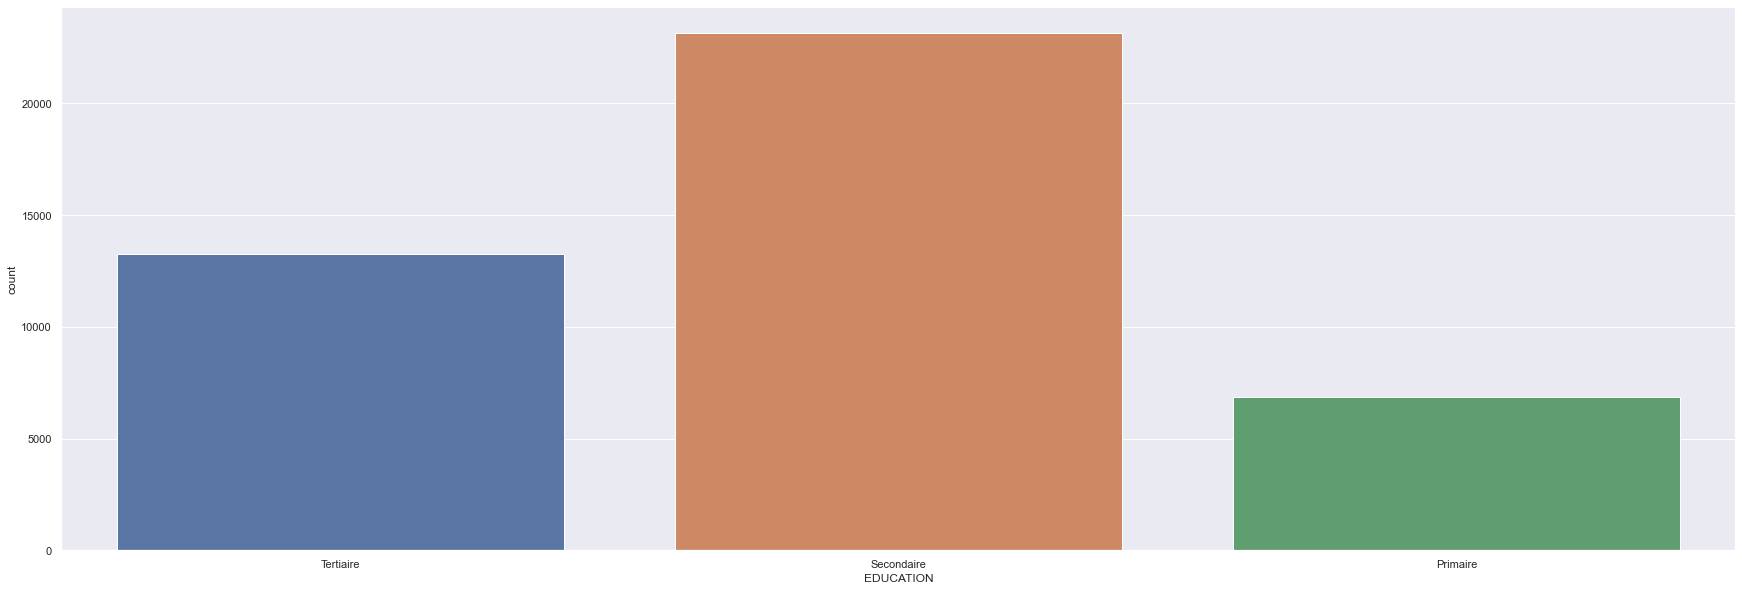

In [134]:
sns.countplot(x=df2['EDUCATION'])

<AxesSubplot:xlabel='HAS_DEFAULT', ylabel='count'>

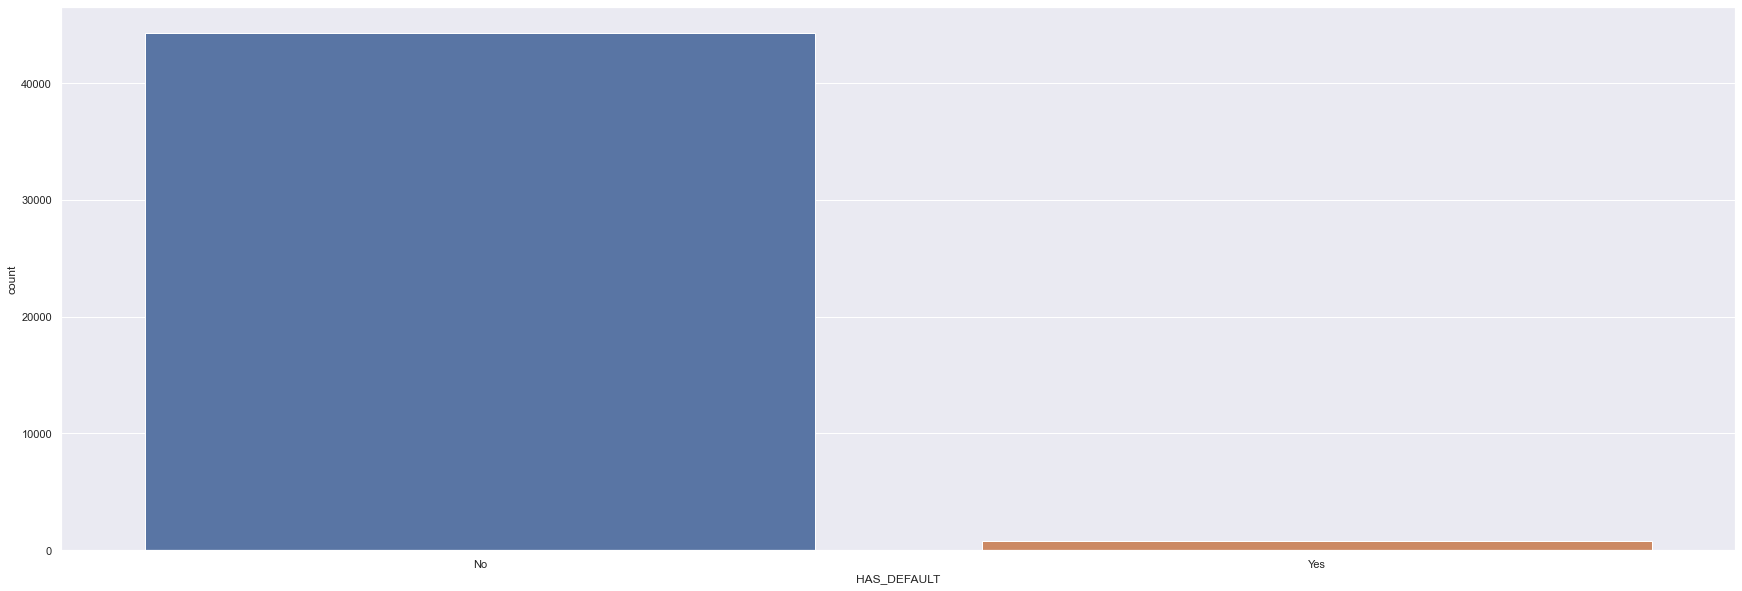

In [201]:
sns.countplot(x=df2['HAS_DEFAULT'])

<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

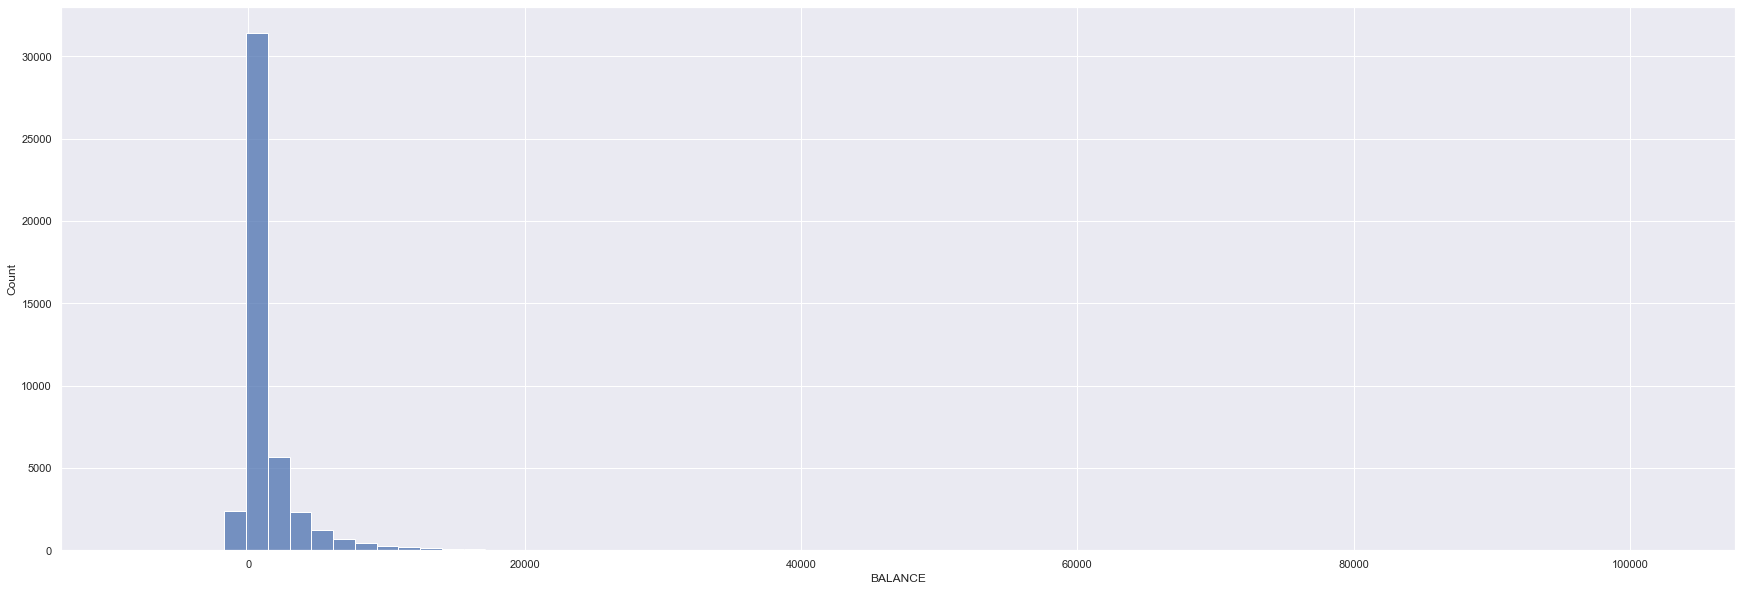

In [174]:
sns.histplot(x=df2['BALANCE'], bins=70)

<AxesSubplot:xlabel='HAS_HOUSING_LOAN', ylabel='count'>

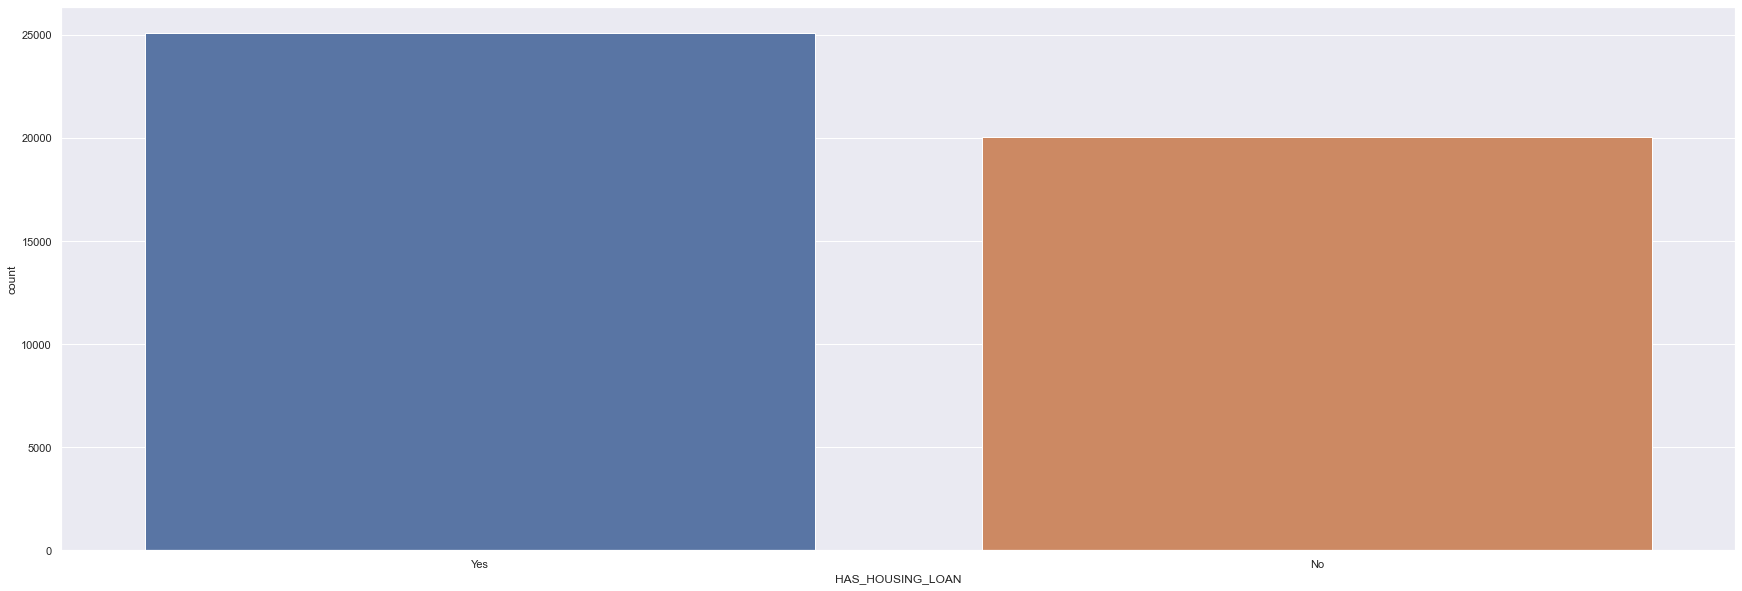

In [150]:
sns.countplot(x=df2['HAS_HOUSING_LOAN'])

<AxesSubplot:xlabel='HAS_PERSO_LOAN', ylabel='count'>

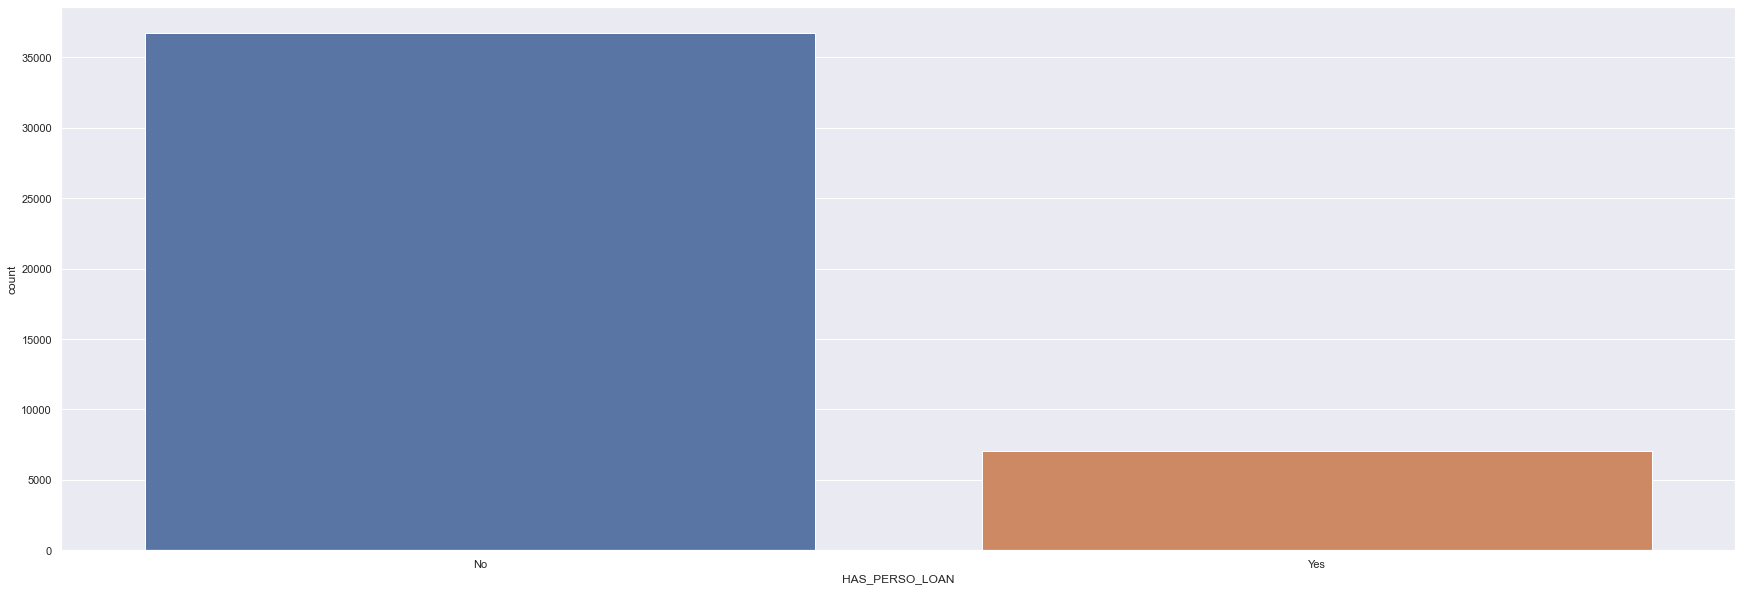

In [155]:
sns.countplot(x=df2['HAS_PERSO_LOAN'])

<AxesSubplot:xlabel='CONTACT', ylabel='count'>

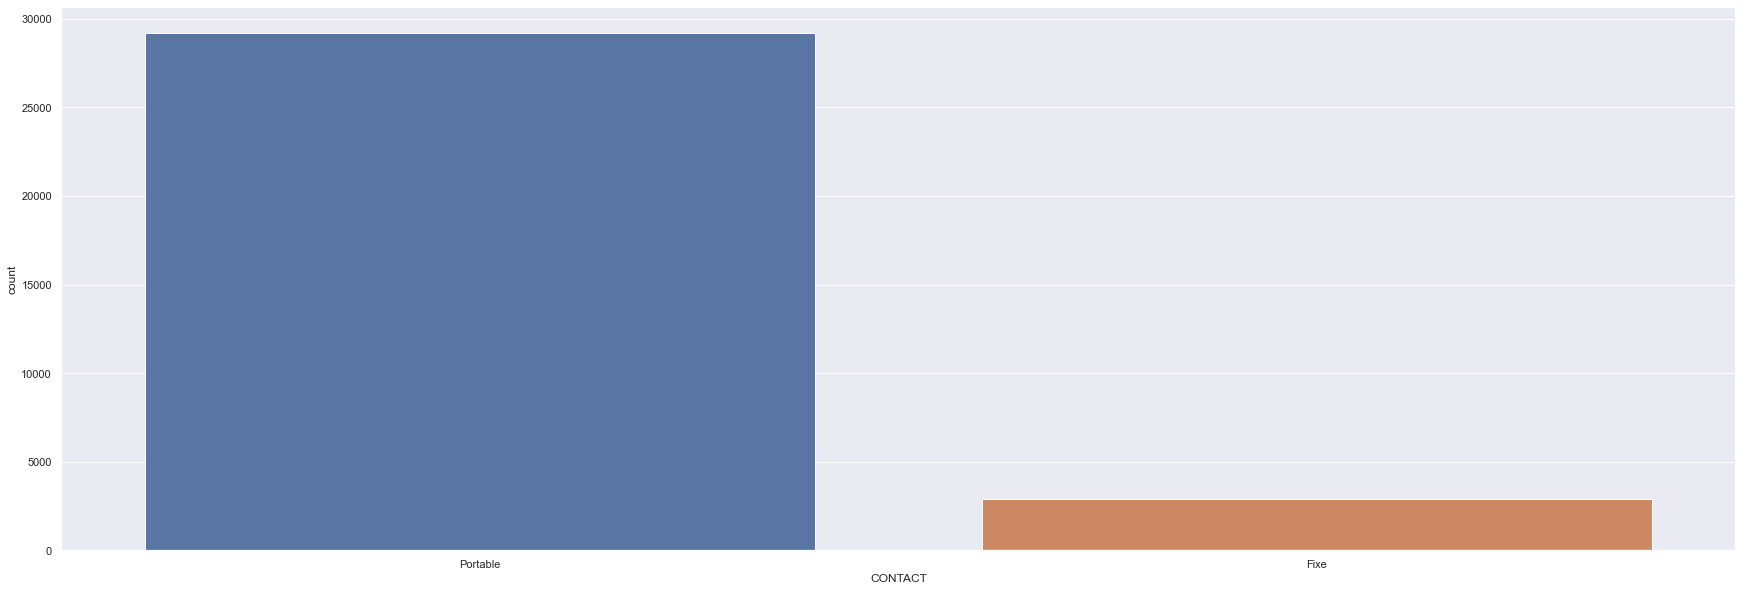

In [156]:
sns.countplot(x=df2['CONTACT'])

<AxesSubplot:xlabel='DURATION_CONTACT', ylabel='Count'>

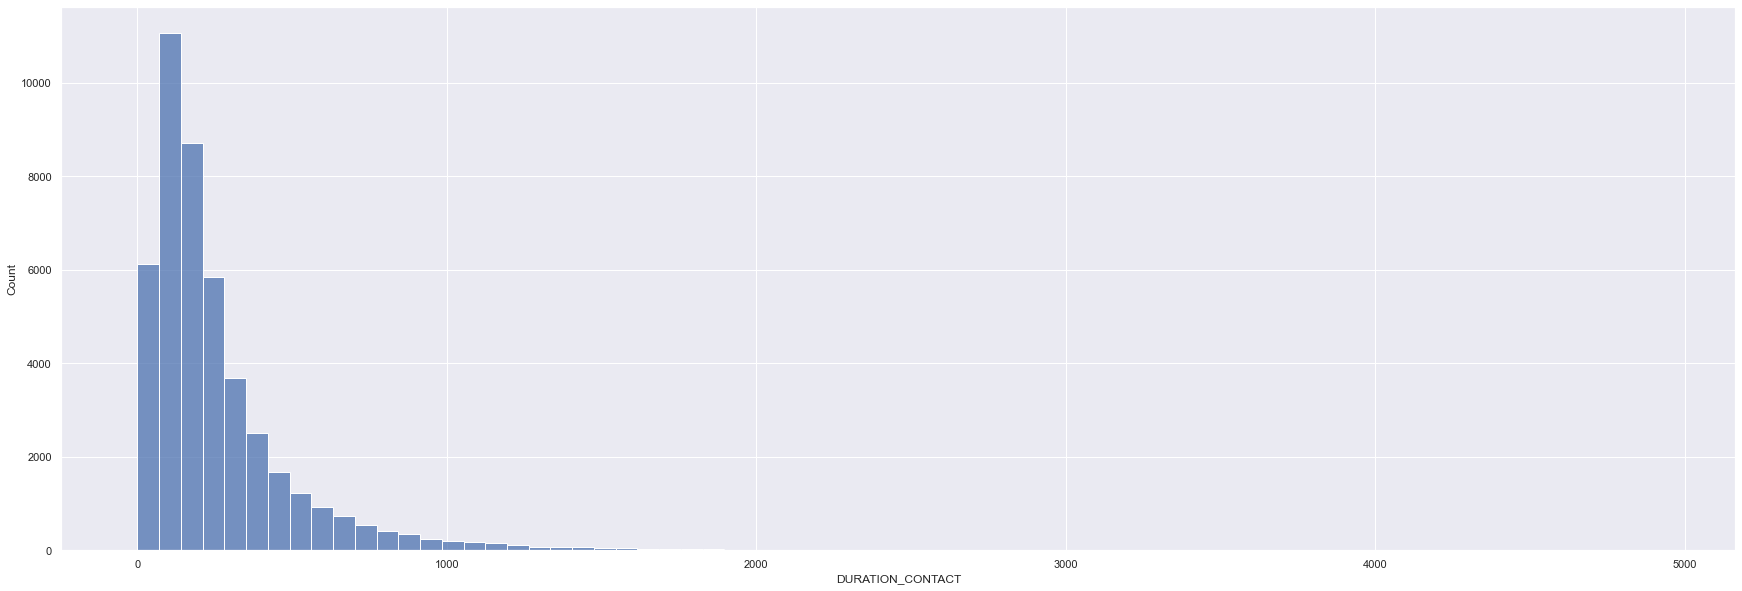

In [169]:
sns.histplot(x=df2['DURATION_CONTACT'], bins=70)

<AxesSubplot:xlabel='NB_CONTACT', ylabel='count'>

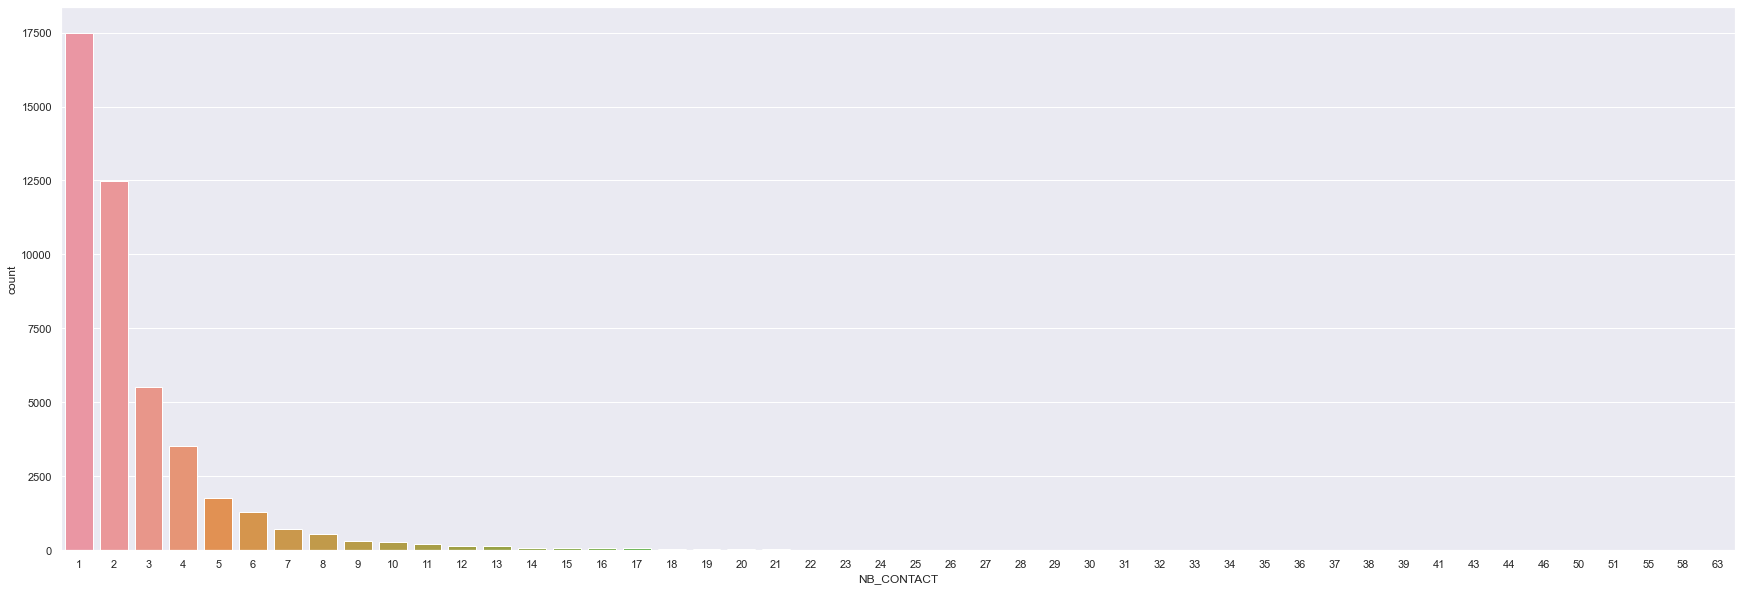

In [175]:
sns.countplot(x=df2['NB_CONTACT'])

<AxesSubplot:xlabel='NB_DAY_LAST_CONTACT', ylabel='Count'>

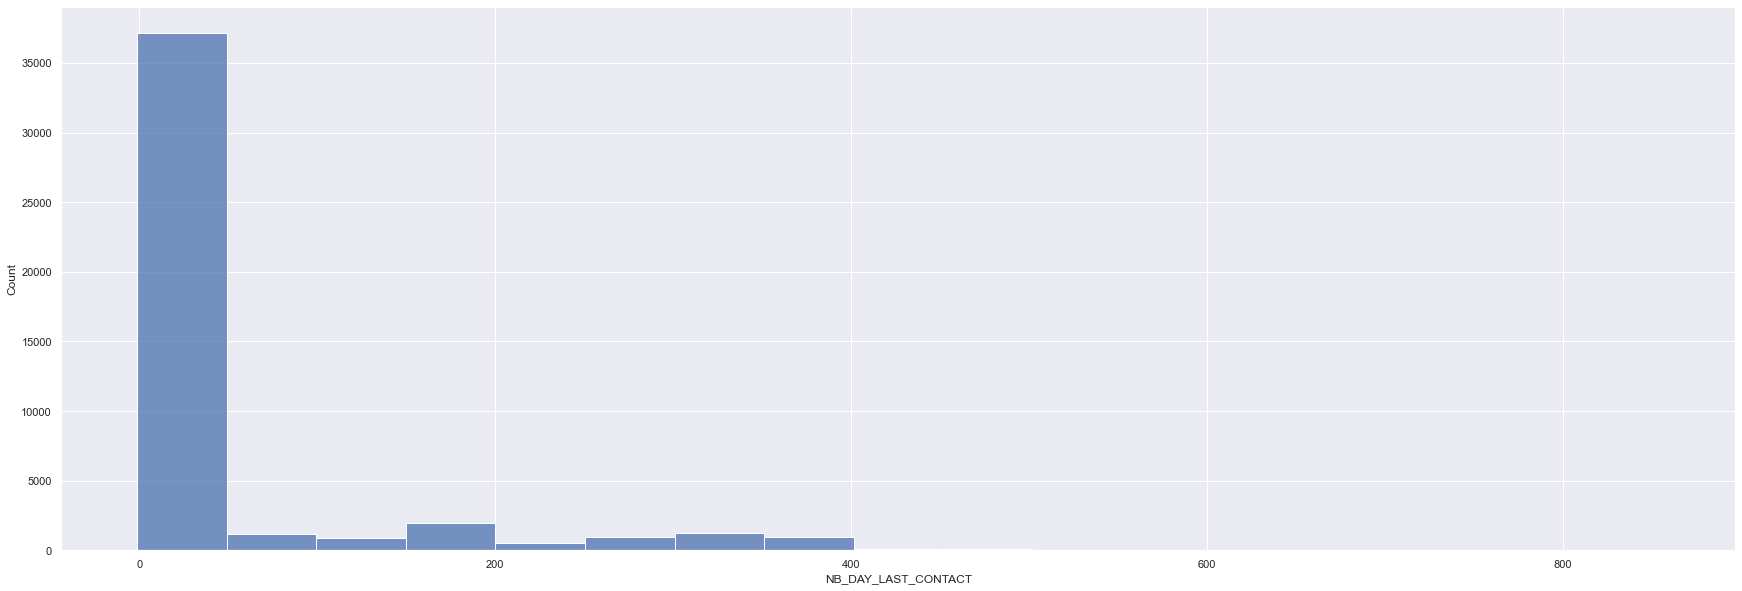

In [184]:
sns.histplot(x=df2['NB_DAY_LAST_CONTACT'])

<AxesSubplot:xlabel='NB_CONTACT_LAST_CAMPAIGN', ylabel='count'>

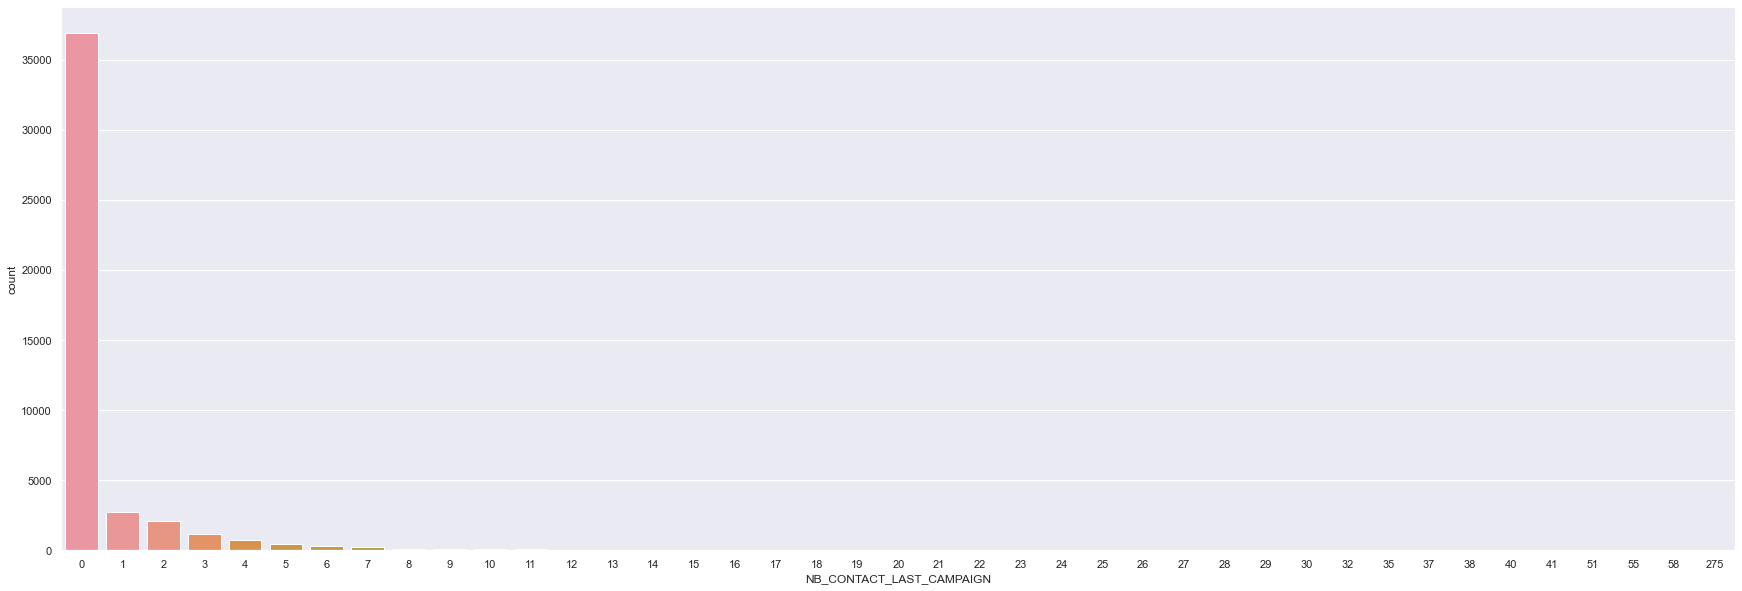

In [183]:
sns.countplot(x=df2['NB_CONTACT_LAST_CAMPAIGN'])

<AxesSubplot:xlabel='RESULT_LAST_CAMPAIGN', ylabel='count'>

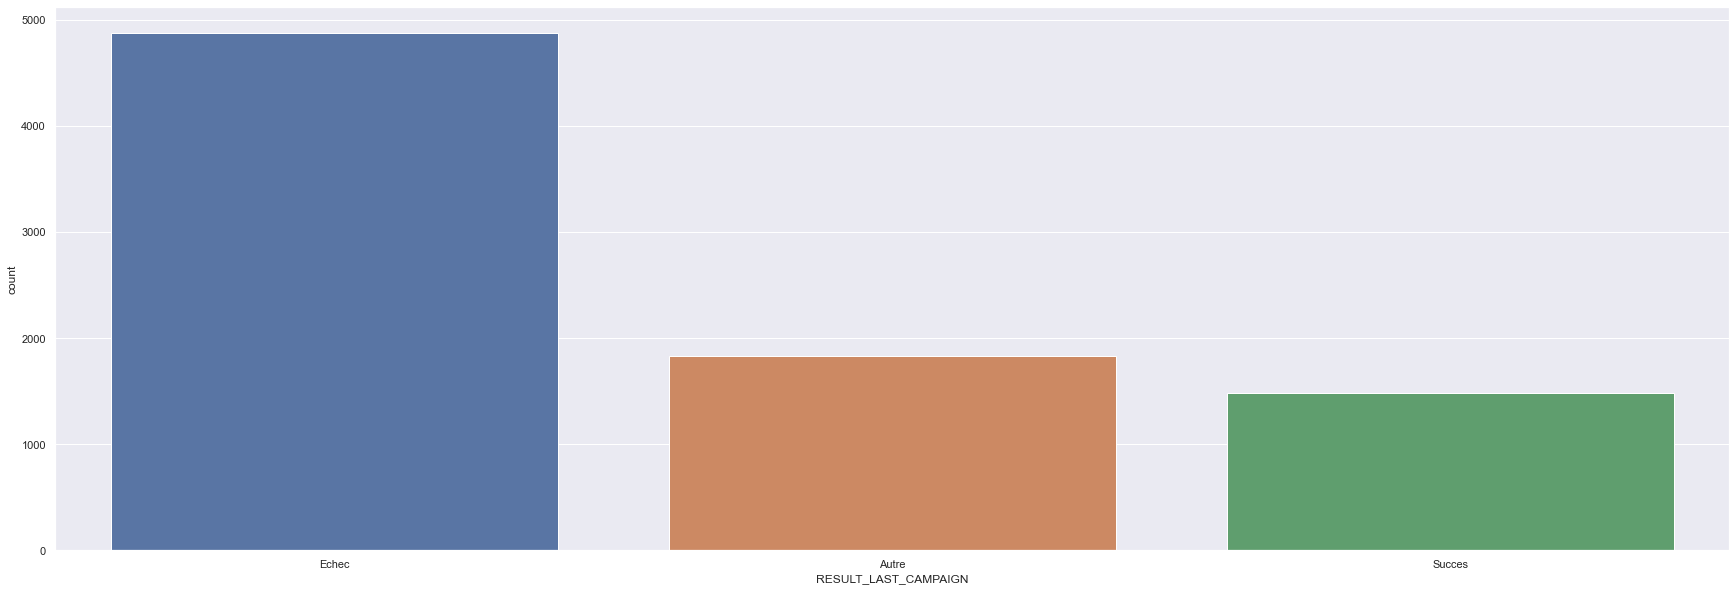

In [185]:
sns.countplot(x=df2['RESULT_LAST_CAMPAIGN'])

<AxesSubplot:xlabel='SUBSCRIPTION', ylabel='count'>

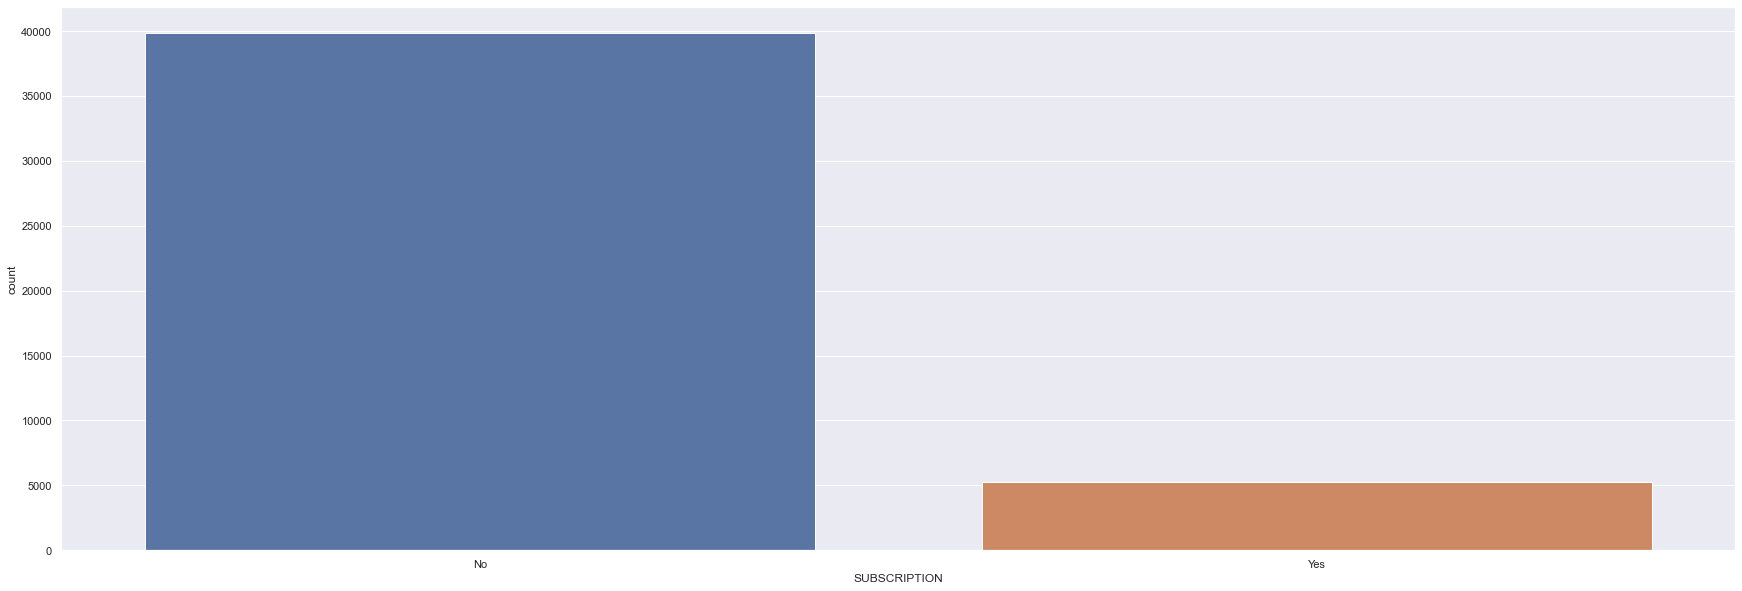

In [186]:
sns.countplot(x=df2['SUBSCRIPTION'])